In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("Downloads/placement.csv")

In [2]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
df.shape

(100, 4)

In [8]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [9]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [10]:
import matplotlib.pyplot as plt

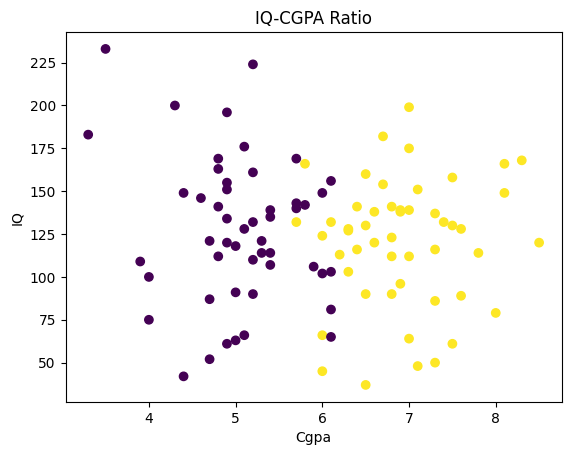

In [17]:
plt.title("IQ-CGPA Ratio")
plt.xlabel("Cgpa")
plt.ylabel("IQ")
plt.scatter(df["cgpa"],df["iq"],c=df["placement"],label=True)

In [18]:
x=df[["cgpa","iq"]]

In [19]:
y=df[["placement"]]

{'whiskers': [<matplotlib.lines.Line2D at 0x214e7624a90>,
 'caps': [<matplotlib.lines.Line2D at 0x214e7626a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x214e5455610>],
 'medians': [<matplotlib.lines.Line2D at 0x214e75bf410>],
 'fliers': [<matplotlib.lines.Line2D at 0x214e75bfe50>],
 'means': []}

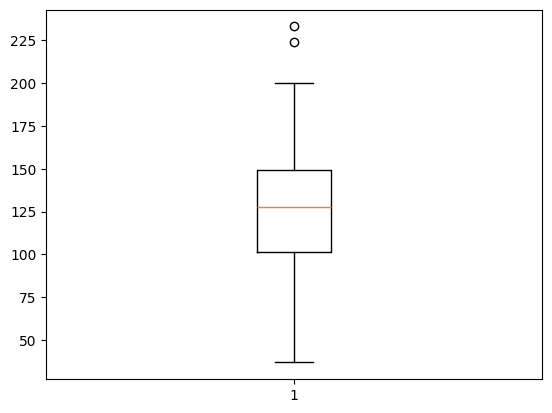

In [55]:
plt.boxplot(df["iq"])

In [34]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [42]:
y_train

,placement
50,0
67,0
81,0
61,1
99,1
...,...
88,0
22,0
18,0
13,1


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
x_train=scaler.fit_transform(x_train)

In [45]:
x_train

array([[-2.28189413,  2.88726276],
       [-0.90970835, -0.08737088],
       [-0.54379214, -0.37190106],
       [ 1.19430985,  0.40409033],
       [ 0.18804027, -0.21670278],
       [-0.8182293 ,  1.41287913],
       [ 0.91987269,  1.38701275],
       [-0.72675025,  1.02488344],
       [ 0.46247743,  0.22302567],
       [ 0.91987269,  0.45582309],
       [-1.27562456,  0.63688774],
       [-0.90970835, -0.78576313],
       [ 0.37099838,  0.50755585],
       [ 1.37726795,  0.9472843 ],
       [ 1.92614226,  0.71448688],
       [ 0.00508217, -0.50123295],
       [ 0.91987269, -1.48415538],
       [-0.6352712 , -0.1908364 ],
       [ 0.09656122,  0.27475843],
       [ 0.82839364,  0.45582309],
       [ 0.73691459,  0.50755585],
       [-1.09266646,  0.50755585],
       [-0.08639688, -0.39776744],
       [-0.72675025, -0.29430192],
       [-1.45858266, -2.05321573],
       [-0.26935499,  0.48168947],
       [ 1.19430985, -0.13910364],
       [ 0.46247743, -0.81162951],
       [ 0.73691459,

In [46]:
x_test=scaler.transform(x_test)

In [47]:
x_test

array([[-0.26935499,  0.27475843],
       [ 0.00508217,  0.0678274 ],
       [-1.0011874 ,  1.93020672],
       [-2.46485224,  1.59394379],
       [ 1.92614226,  1.15421534],
       [ 1.37726795, -1.56175452],
       [ 0.91987269,  2.00780586],
       [-1.09266646,  1.0766162 ],
       [-1.18414551, -0.00977174],
       [ 1.468747  , -0.83749589]])

In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [59]:
clf.fit(x_train,y_train)

C:\Users\Arunkumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [60]:
clf.predict(x_test)

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [61]:
y_test

,placement
8,0
60,1
40,0
28,0
74,1
25,0
47,0
65,1
55,1
73,0


In [62]:
y_pred=clf.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [66]:
#decision boundary
from mlxtend.plotting import plot_decision_regions

In [80]:
y_train=y_train.values.reshape(-1)

In [83]:
x_train

,cgpa,iq
51,4.8,141.0
34,4.8,163.0
96,4.4,42.0
49,5.4,135.0
45,6.0,66.0
...,...,...
48,6.6,138.0
15,5.1,176.0
31,3.9,109.0
20,6.6,120.0


C:\Users\Arunkumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

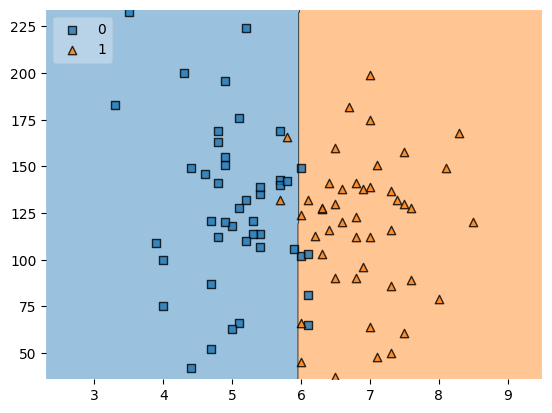

In [84]:
 plot_decision_regions(x_train.values,y_train,clf=clf,legend=2)